Блокнот для анализа результатов экспериментов из "Arcgitecture_search_v2", сохраненных в файл.

In [1]:
import torchvision
from research_task_utils_for_autosearch import *
from models_autosearch import *
from torchsummary import summary
import numpy as np
import json

In [5]:
# dedault path to data:
pth = "../tmp_checkpoints/architecture_search_v2/statistics/Space_1_statistics.json"

def statistics_reader(json_statistics_path=pth, exp_name=""):
    data = []
    with open(json_statistics_path) as f:
        json_data = json.load(f)
        for log in json_data:
            if log["model_info"]["name"] == exp_name:
                data.append((tuple(log["model_info"]["configuration"]),log["statistics"]))
    return data

In [46]:
exp1_data = statistics_reader(exp_name="Space_110_times_training")
exp1_data = [x[1]["testacc"] for x in exp1_data]

In [12]:
len(exp1_data)

10

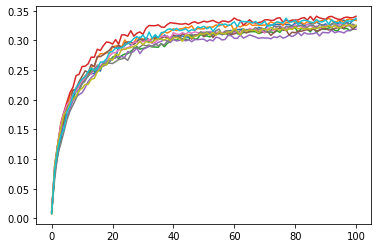

In [31]:
# Графики зависимости test accuracy от номера эпохи для 10 обучений одинаковых моделей
for acc_log in exp1_data:
    plt.plot(acc_log)
plt.show()

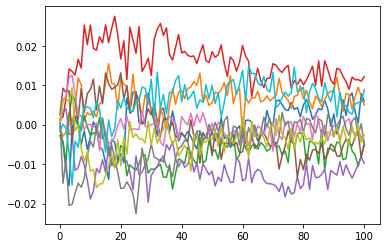

In [19]:
# вычтем из всех зависимостей acc(n) среднее значение по моделям для каждого n (нормируем):

# видно, что, если одна модель была лучше другой в начале обучения (10 ep.), то, скорее-всего, 
# в конце будет так же

exp1_data_np = np.array(exp1_data)
exp1_data_np -= exp1_data_np.mean(axis=0)
for acc_log in exp1_data_np:
    plt.plot(acc_log)
plt.show()

In [20]:
z = np.array([0.1,0.2, 0.3, 0.4])
z[-1:]

array([0.4])

In [27]:
# теперь изучим различные статистики для оценки accuracy

# первая статистика -- testacc[-1]:
def last_acc(testacc_arr):
    return testacc_arr[-1]

# среднее за m последних эпох:
m=20
def mean_last_acc(testacc_arr, m=m):
    return np.mean(testacc_arr[-m:])

# медиана за m последних эпох:
def median_last_acc(testacc_arr, m=m):
    return np.median(testacc_arr[-m:])

functions = [last_acc, mean_last_acc, median_last_acc]

def calculate_statistics(exp_data_np, statistics_func):
    result = []
    for testacc_arr in exp_data_np:
        result.append(statistics_func(testacc_arr))
    return np.array(result)


exp1_data_np = np.array(exp1_data)

for f in functions:
    result = calculate_statistics(exp1_data_np, f)
    print("Статистика ", f)
    print("Mean, std: ", result.mean(), result.std())
    print()

Статистика  <function last_acc at 0x7f71c0502170>
Mean, std:  0.32861999999999997 0.006977650034216397

Статистика  <function mean_last_acc at 0x7f71c0502200>
Mean, std:  0.3255195000000001 0.006975805132742728

Статистика  <function median_last_acc at 0x7f71c0502290>
Mean, std:  0.325465 0.007064419650615329



Вывод -- для всех таких способов оценки acc стандартное отклонение порядка 7e-3

Можно использовать как результат после

In [23]:
print(median_last_acc)

<function median_last_acc at 0x7f71c0501480>


In [45]:
exp2_data = statistics_reader(exp_name="Space_1q1_direction_tests")

In [48]:
exp2_data = [(x[0][0],x[1]["testacc"]) for x in exp2_data]

In [49]:
exp2_data 

[(32,
  [0.0106,
   0.0861,
   0.106,
   0.1298,
   0.1381,
   0.1555,
   0.1668,
   0.1755,
   0.1846,
   0.1922,
   0.1964,
   0.2052,
   0.2168,
   0.2217,
   0.2313,
   0.2402,
   0.2401,
   0.2496,
   0.2503,
   0.2577,
   0.2571,
   0.268,
   0.2623,
   0.2681,
   0.2646,
   0.2738,
   0.27,
   0.2766,
   0.2793,
   0.2781,
   0.2828,
   0.2815,
   0.2814,
   0.2863,
   0.2877,
   0.2839,
   0.2825,
   0.2836,
   0.2918,
   0.2879,
   0.2854,
   0.2926,
   0.2834,
   0.2913,
   0.2949,
   0.2986,
   0.2984,
   0.3008,
   0.298,
   0.3005,
   0.2992,
   0.2985,
   0.2985,
   0.3031,
   0.2989,
   0.2997,
   0.3006,
   0.3002,
   0.3046,
   0.3047,
   0.3071,
   0.3035,
   0.3034,
   0.3039,
   0.3048,
   0.3061,
   0.3074,
   0.3048,
   0.3045,
   0.3019,
   0.3056,
   0.3011,
   0.3086,
   0.3064,
   0.3065,
   0.3043]),
 (31,
  [0.0108,
   0.0742,
   0.1194,
   0.1405,
   0.1591,
   0.18,
   0.1956,
   0.2056,
   0.2094,
   0.2227,
   0.2354,
   0.2407,
   0.2466,
   0.2453,
   

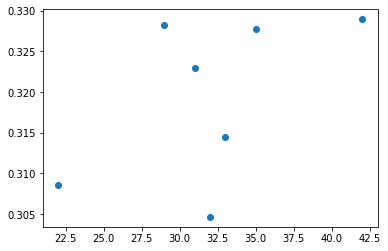

In [54]:
Q1 = [x[0] for x in exp2_data]
Acc = [median_last_acc(x[1]) for x in exp2_data]

plt.scatter(Q1, Acc)
plt.show()

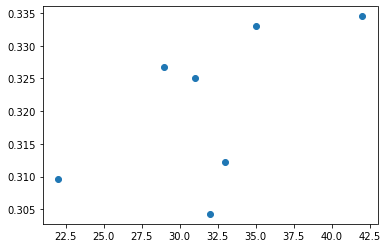

In [52]:
Q1

[32, 31, 33, 29, 35, 22, 42]

In [53]:
Acc

[0.3043, 0.3251, 0.3122, 0.3267, 0.333, 0.3097, 0.3345]